<a href="https://colab.research.google.com/github/mavito/ML_Concepts/blob/main/ML_AnalyticGeometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analytic Geometry in Machine Learning**

- ## Assignment Architecture and Mini-Dataset:

To facilitate the practical exploration of these concepts, we define a "mini-dataset" of geometric vectors.

Unlike the high-dimensional sparse datasets often used in production environments, we restrict our initial exploration to $\mathbb{R}^2$ and $\mathbb{R}^3$.

This intentional low-dimensionality allows for direct visualization and mental modeling, which is crucial for grasping concepts like projections and rotations before scaling them to $\mathbb{R}^{1000}$.

In [ ]:
# GLOBAL SETUP FOR THE ASSIGNMENT
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mini-Dataset: Geometric Vectors
# We define a small set of vectors in R^2 and R^3 to use across all exercises.
# These represent data points (features) in a geometric space.

# Vectors in 2D (e.g., Feature 1 vs Feature 2)
# vec_a represents a standard data point in quadrant I
vec_a = np.array([3,4])
# vec_b is close to the origin, representing a smaller magnitude signal
vec_b = np.array([1,2])
# vec_c is in quadrant II, useful for testing angles > 90 degrees
vec_c = np.array([-2, 1])

In [ ]:
# Vectors in 3D (e.g., Feature 1, Feature 2, Feature 3)
# These allow us to test cross-products and 3D subspaces
vec_x = np.array([1, 0, 0])
vec_y = np.array([0, 1, 0])
vec_z = np.array([1, -1, 0])
print("Dataset Initialized.")
print(f"2D Vectors: a={vec_a}, b={vec_b}, c={vec_c}")
print(f"3D Vectors: x={vec_x}, y={vec_y}, z={vec_z}")

Dataset Initialized.
2D Vectors: a=[3 4], b=[1 2], c=[-2  1]
3D Vectors: x=[1 0 0], y=[0 1 0], z=[ 1 -1  0]


## **1. Norms: The Measurement of Magnitude and Sparsity**

Think of a norm as a "ruler" for vectors.

Just as a physical ruler measures how long a piece of string is, a mathematical norm measures how "long" a vector is or how far it is from the origin (zero).

However, in the world of data, there are different "rules of travel" that change how we measure length.

- **Euclidean Norm ($L_2$):**
  - Imagine you are a bird flying directly from the start to the end of the vector.
  - You fly in a straight line, ignoring buildings or obstacles.
  - The distance you cover is the Euclidean norm.
  - This is the standard "straight-line" distance we learn in school ($a^2 + b^2 = c^2$).

- **Manhattan Norm ($L_1$):**
  - Imagine you are a taxi driver in a city like New York with grid-like streets.
  - You cannot drive through buildings (diagonally); you must stick to the streets.
  - To get to your destination, you drive the distance east, then the distance north.
  - The total distance on your odometer is the Manhattan norm.
  - It is simply the sum of the absolute blocks you traveled.

*The following code block demonstrates the calculation of these norms from first principles (manual calculation) and verifies them against optimized libraries.*

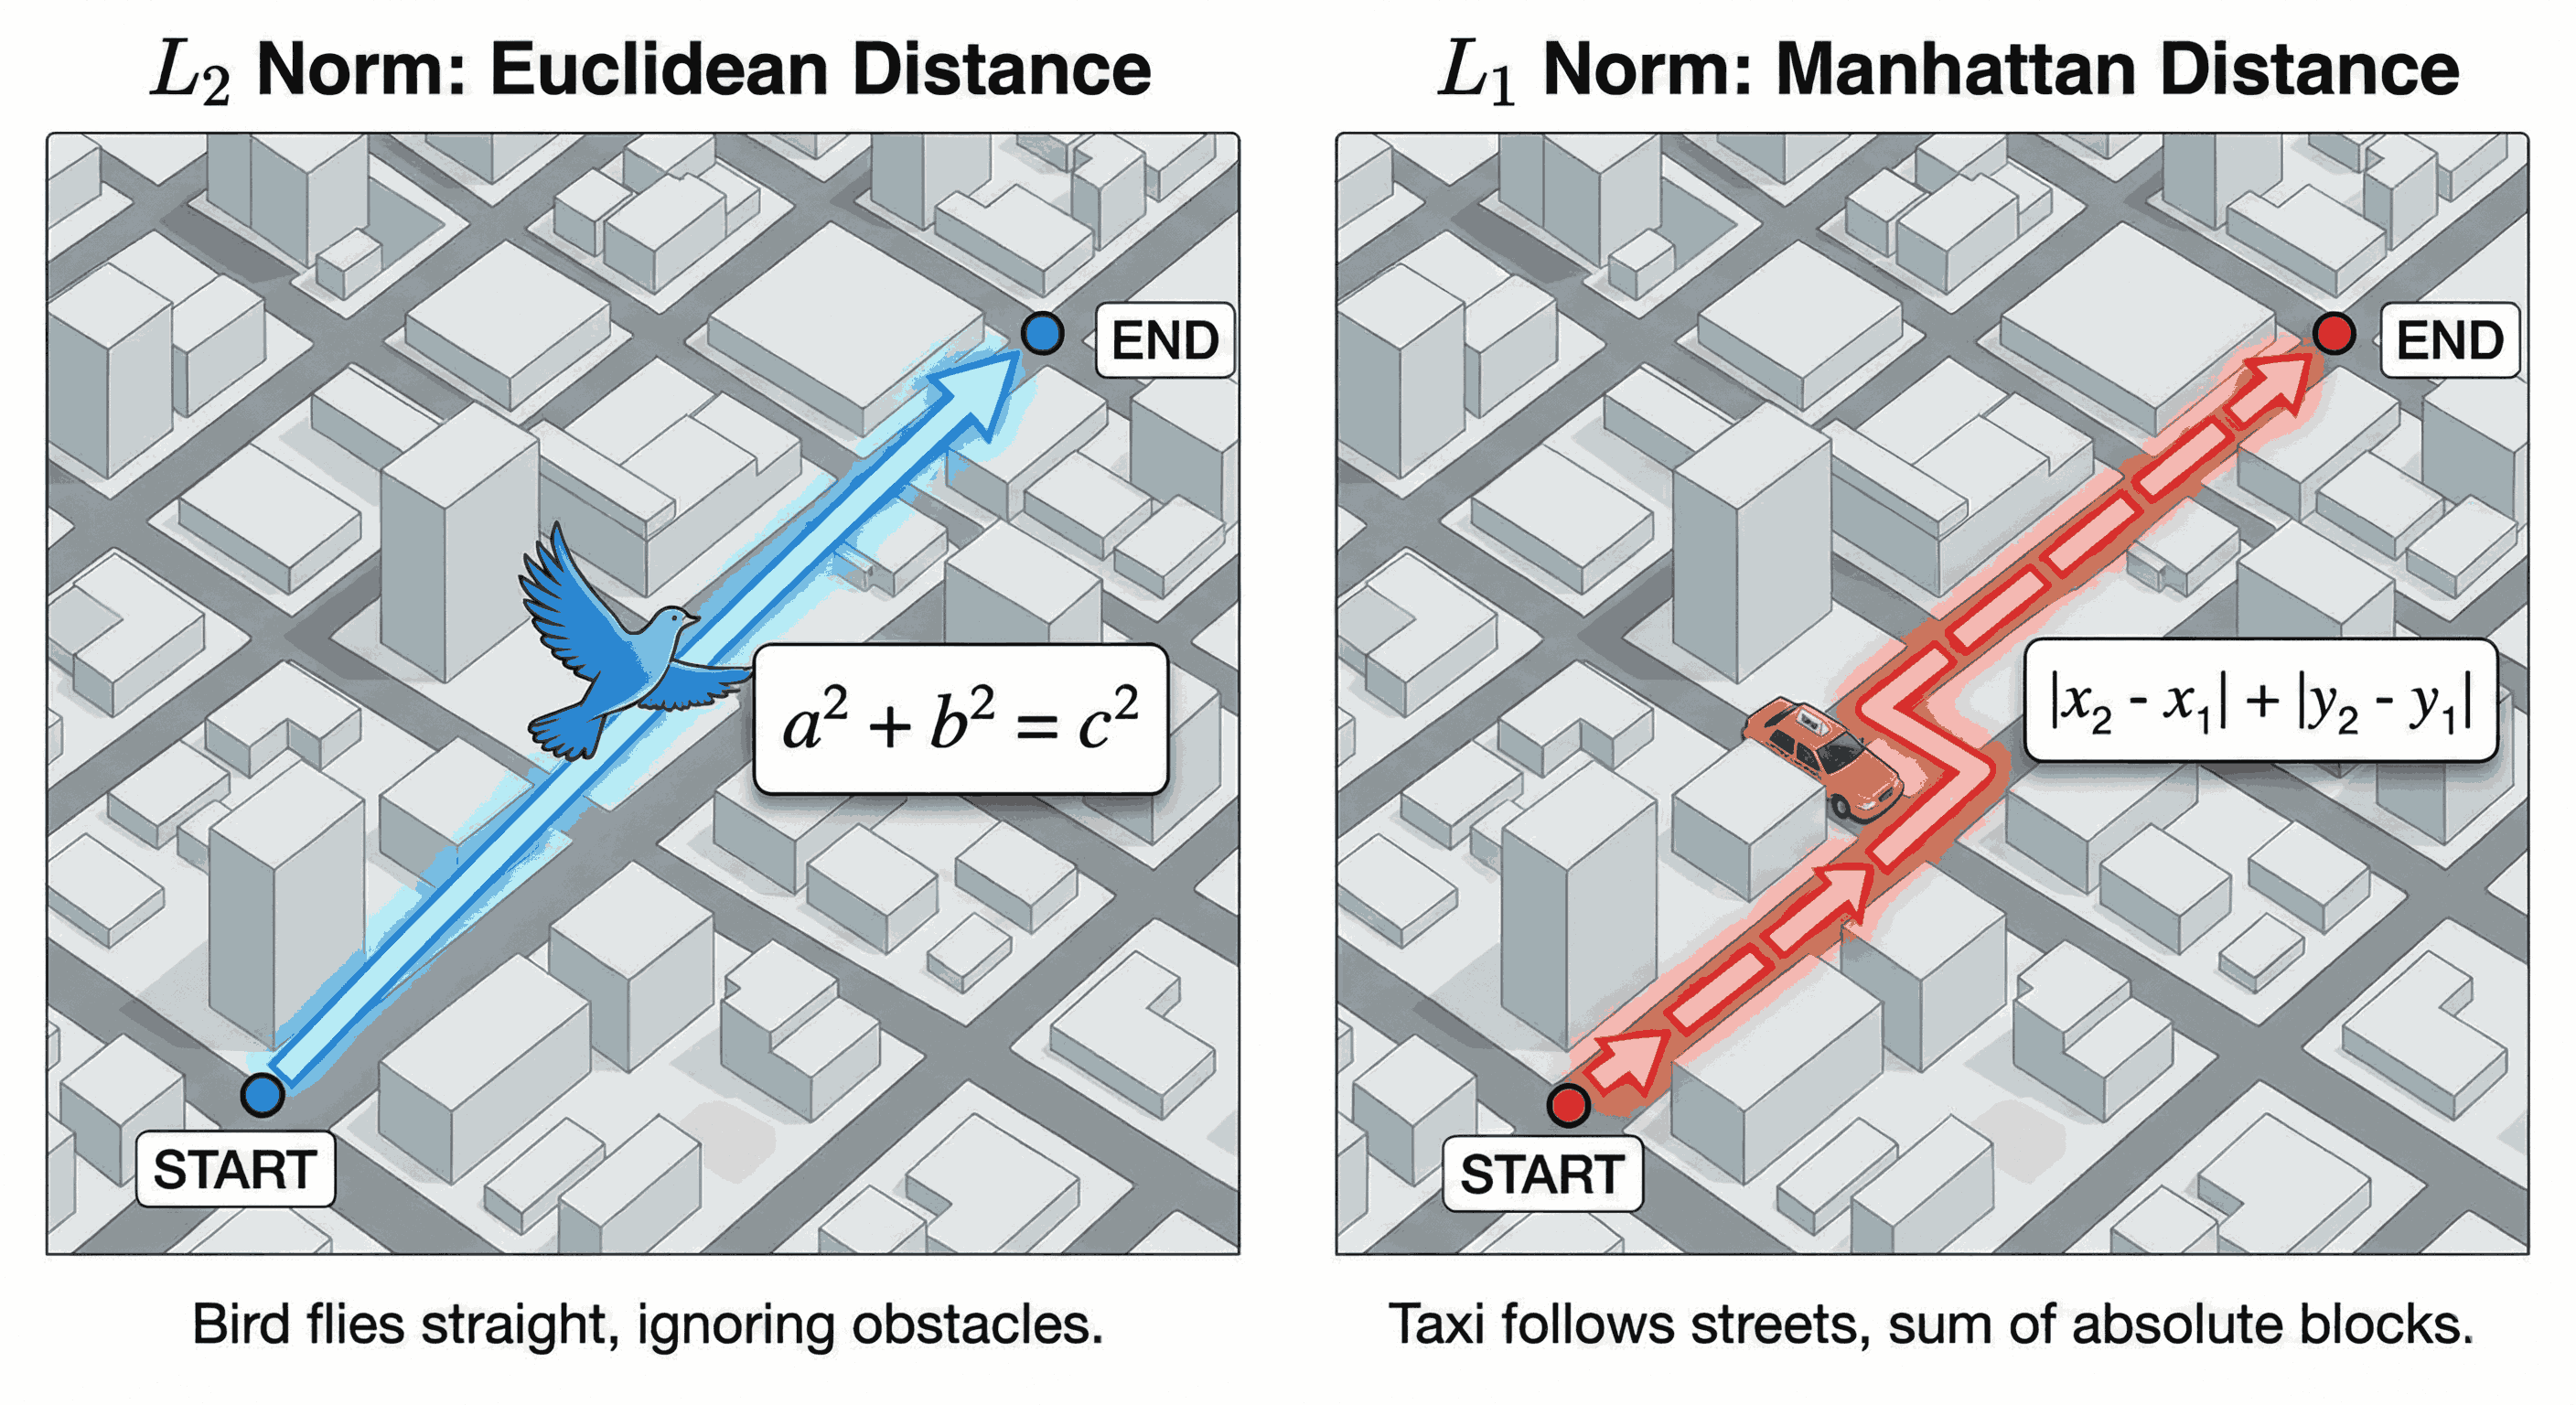

In [ ]:
def calculate_norms(vector):
    """
    Calculates L1 and L2 norms of a vector manually and using numpy.

    Args:
    vector (np.array): Input vector

    Returns:
    tuple: (l1_manual, l2_manual, l1_numpy, l2_numpy)
    """
    # 1. L1 Norm (Manhattan): Sum of absolute values
    # Intuition: Taxi driving distance along grid lines
    # Math: |x_1| + |x_2| +...
    l1_manual = np.sum(np.abs(vector))

    # 2. L2 Norm (Euclidean): Square root of sum of squares
    # Intuition: Straight line distance (hypotenuse)
    # Math: sqrt(x_1^2 + x_2^2 +...)
    l2_manual = np.sqrt(np.sum(vector**2))

    # Verification using numpy's linear algebra module
    # The 'ord' parameter specifies the order of the norm
    l1_numpy = np.linalg.norm(vector, 1)
    l2_numpy = np.linalg.norm(vector, 2)

    return l1_manual, l2_manual, l1_numpy, l2_numpy

# Applying to our dataset vector 'vec_a' which is
l1_a, l2_a, _, _ = calculate_norms(vec_a)

print(f"Vector a: {vec_a}")
print(f"L1 Norm (Taxi dist): {l1_a} (Calculation: |3| + |4|)")
print(f"L2 Norm (Bird dist): {l2_a} (Calculation: sqrt(3^2 + 4^2) = sqrt(9+16) = 5)")

Vector a: [3 4]
L1 Norm (Taxi dist): 7 (Calculation: |3| + |4|)
L2 Norm (Bird dist): 5.0 (Calculation: sqrt(3^2 + 4^2) = sqrt(9+16) = 5)


## Task 1.1 : Calculate the $L_{\infty}$ (Infinity) norm for vec_c and vec_x.

*Context:*

The Infinity norm answers the question: "What is the single largest component of this vector?"

It represents the maximum dominance of any single feature.

In geometry, the unit ball of the $L_{\infty}$ norm is a square (in 2D) or a cube (in 3D).

Math: $\|x\|_{\infty} = \max(|x_1|, |x_2|,..., |x_n|)$.

*Problem:*

Implement a function calculate_inf_norm(vector) that finds this value using standard python logic (no np.linalg.norm initially), then verify your result with np.linalg.norm(vector, np.inf).


In [ ]:
# WRITE CODE HERE

## **2. Inner Products**

The inner product (commonly called the dot product) is a mathematical way to calculate how much two vectors "agree" or point in the same direction. It is the measure of their alignment.

Imagine two arrows starting from the same spot.

- **High Positive Value:**
  - If they point in roughly the same direction, their inner product is positive and large.
  - They have high "agreement."

- **Zero:**
  - If they point in perpendicular directions (like the corner of a room, 90 degrees), their inner product is zero.
  - They have "zero agreement"—changing one vector doesn't affect the direction of the other at all.
  - They are independent.

- **Negative Value:**
  - If they point in opposite directions (greater than 90 degrees), the inner product is negative.
  - They disagree.

In machine learning recommendation systems, we use this to check similarity.
If a "user preference" vector has a high inner product with a "movie feature" vector, it implies the user's interests align with the movie's content, predicting a "watch."

In [ ]:
# Python Implementation : INNER PRODUCTS

def compute_inner_product(v1, v2):
    """
    Computes the dot product (standard inner product) of two vectors.
    """
    # Method 1: Element-wise multiplication and sum
    # Math: x_1*y_1 + x_2*y_2 +...
    # This explicit calculation highlights the 'sum of interactions'
    dot_manual = np.sum(v1 * v2)

    # Method 2: Numpy dot function
    # This is the optimized implementation used in production
    dot_numpy = np.dot(v1, v2)

    return dot_manual, dot_numpy

# Analyzing relationship between vec_a (3,4) and vec_b (1,2)
dot_ab, _ = compute_inner_product(vec_a, vec_b)

# Analyzing relationship between vec_a (3,4) and a perpendicular vector (-4, 3)
# We define a vector visually perpendicular to (3,4) to test the zero property.
vec_perp = np.array([-4, 3])
dot_perp, _ = compute_inner_product(vec_a, vec_perp)

print(f"Inner Product (a, b): {dot_ab} (Positive -> roughly same direction)")
print(f"Inner Product (a, perp): {dot_perp} (Zero -> Perpendicular/Orthogonal)")

Inner Product (a, b): 11 (Positive -> roughly same direction)
Inner Product (a, perp): 0 (Zero -> Perpendicular/Orthogonal)


## Task 2.1 : Define a "weighted" inner product.

*Context:*

In many ML problems, certain features (dimensions) are more reliable or important than others.

A standard dot product treats all dimensions equally.

A weighted inner product allows us to emphasize certain dimensions by multiplying the components by weights before summing.

This corresponds to the form $\langle x, y \rangle_W = x^T W y$, where $W$ is a diagonal matrix of weights.

*Problem:*

Calculate the weighted inner product of vec_x and vec_y where the weight matrix is $W = \text{diag}(2, 1, 5)$.

This means the interaction in the first dimension is worth 2x, the second is 1x, and the third is 5x.

Formula to implement: $\langle x, y \rangle_W = 2x_1y_1 + 1x_2y_2 + 5x_3y_3$.

In [ ]:
#WRITE CODE HERE

## **3. Lengths and Distances**

Distance is simply the length of the line connecting two data points.

- **Difference:**
  - If you have two data points, $A$ and $B$, you first find the "difference vector" ($B - A$).
  - This vector represents the path or displacement to get from $A$ to $B$
  
- **Measurement:**
  - You then measure the length (norm) of that difference vector using your chosen ruler (Euclidean or Manhattan).
  
In a machine learning context, if point $A$ represents the data for a "dog" image and point $B$ represents a "cat" image:

- A small distance means the computer thinks the images look very similar (perhaps both are furry animals).
- A large distance means they look very different.

Algorithms like K-Means clustering use this concept to group similar data points together.

In [ ]:
# SUB-TOPIC: LENGTHS AND DISTANCES

def euclidean_distance(v1, v2):
    """
    Computes the Euclidean distance between two vectors.
    """
    # Step 1: Find the difference vector (displacement)
    # This vector represents the path from v2 to v1
    diff = v1 - v2

    # Step 2: Measure the length (norm) of the difference
    # We use L2 norm for standard Euclidean distance
    distance = np.linalg.norm(diff)

    return distance

# Distance between vec_a (3,4) and vec_b (1,2)
dist_ab = euclidean_distance(vec_a, vec_b)

# Distance between vec_a and vec_c (-2, 1)
dist_ac = euclidean_distance(vec_a, vec_c)

print(f"Distance a <-> b: {dist_ab:.2f}")
print(f"Distance a <-> c: {dist_ac:.2f}")
print("Interpretation: Since dist_ab < dist_ac, vector 'a' is geometrically closer to 'b'.")

Distance a <-> b: 2.83
Distance a <-> c: 5.83
Interpretation: Since dist_ab < dist_ac, vector 'a' is geometrically closer to 'b'.


## Task 3.1 : Calculate the distance between vec_x and vec_z using the Manhattan ($L_1$) metric.

**Instruction:**

Remember that Manhattan distance is the sum of the absolute differences of the coordinates.

It asks: "How far do I have to travel if I can only change one feature at a time?"

**Formula:**

$d_1(x, z) = \sum |x_i - z_i|$.

**Analysis:**

*Is the Manhattan distance larger or smaller than the Euclidean distance for these two vectors? (Verify this with your code).*

*Hint: The "Taxi" route is usually longer than the "Bird" route.*

In [ ]:
#WRITE CODE HERE

## **4. Angles and Orthogonality**

The angle tells us about the relationship or quality of the connection between two features, completely ignoring how "strong" or "loud" those features are (their size).

- Angle = 0 degrees:
  - The vectors are "parallel."
  - They point in the same direction.
  - When one increases, the other increases.
  - This implies a Perfect Positive Correlation.

- Angle = 90 degrees:
  - The vectors are "orthogonal."
  - Knowing the value of one tells you absolutely nothing about the value of the other.
  - They are Uncorrelated or Independent.

- Angle = 180 degrees:
  - They are opposites.
  - When one goes up, the other goes down.
  - This implies a Negative Correlation.



In [ ]:
# SUB-TOPIC: ANGLES AND ORTHOGONALITY
def angle_between(v1, v2):
    """
    Computes the angle in degrees between two vectors using the definition of dot product.
    """
    # 1. Compute Inner Product (The interaction)
    dot_prod = np.dot(v1, v2)
    # 2. Compute Norms (The magnitudes)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    # 3. Compute Cosine Similarity
    # Formula: cos(theta) = (a. b) / (|a| * |b|)
    # We clip values to [-1, 1] to handle potential floating point errors slightly outside range
    cos_theta = np.clip(dot_prod / (norm_v1 * norm_v2), -1.0, 1.0)
    # 4. Convert to Angle
    # arccos returns radians, so we convert to degrees for readability
    angle_rad = np.arccos(cos_theta)
    angle_deg = np.degrees(angle_rad)
    return cos_theta, angle_deg

cos_sim, angle = angle_between(vec_a, vec_b)
print(f"Vector a: {vec_a}, Vector b: {vec_b}")
print(f"Cosine Similarity: {cos_sim:.3f}")
print(f"Angle: {angle:.2f} degrees")

# Check Orthogonality explicitly
# Vectors [1,0] and [0,1] are the standard x and y axes
v_ortho_1 = np.array([1, 0])
v_ortho_2 = np.array([0, 1])
_, angle_ortho = angle_between(v_ortho_1, v_ortho_2)
print(f"Angle between [1,0] and [0,1]: {angle_ortho} degrees (Expect 90.0)")

Vector a: [3 4], Vector b: [1 2]
Cosine Similarity: 0.984
Angle: 10.30 degrees
Angle between [1,0] and [0,1]: 90.0 degrees (Expect 90.0)


## Task 4.1: Find a vector that is orthogonal to vec_x ($$).

**Constraint:**

The vector must be non-zero.

**Method:**

You need a vector $u = [u_1, u_2, u_3]$ such that the dot product is zero:

$1\cdot u_1 + 0\cdot u_2 + 1\cdot u_3 = 0$.

This simplifies to $u_1 + u_3 = 0$.

**Action:**

*Choose values for $u_1, u_2, u_3$ that satisfy this equation (there are infinite solutions).*

*Define this vector in Python and use the angle_between function to prove the angle is 90 degrees.*

In [ ]:
#WRITE CODE HERE

## **5. Orthonormal Basis**

Imagine you are tiling a floor. To do a good job, you need reference lines.

- It is easiest if your reference lines are exactly 90 degrees apart (Orthogonal).
  - If they are skewed, your tiles will require difficult cuts.

- It is easiest if your measuring stick is exactly 1 meter long (Normalized).
  - If your ruler is 1.34 meters long, the math for calculating area becomes messy.

An Orthonormal Basis is just a "clean" coordinate system where every axis is perpendicular to the others and has a scale of 1.

The Gram-Schmidt process is a mathematical recipe for taking a messy, skewed set of arrows and straightening them out into a clean, perpendicular grid without losing the space they cover.

It's like tidying up the geometry.

In [ ]:
# SUB-TOPIC: ORTHONORMAL BASIS (Gram-Schmidt)
def gram_schmidt(vectors):
    """
    Applies Gram-Schmidt process to a list of vectors to create an Orthonormal Basis.
    """
    basis = []
    for v in vectors:
        # 1. Orthogonalization step
        # Start with the original vector v
        w = v.copy()
        # Subtract the projection of v onto every vector currently in our basis
        # This removes the "redundant" direction that we have already captured
        for b in basis:
            projection = np.dot(v, b) * b
            w = w - projection
        # 2. Normalization step
        # If the remaining vector w is not zero, scale it to length 1
        if np.linalg.norm(w) > 1e-10:  # Check for near-zero to avoid errors
            u = w / np.linalg.norm(w)
            basis.append(u)
    return np.array(basis)

# Let's create an ONB from our 3D vectors x, y, z
# These vectors span 3D space but are slanted/skewed relative to each other.
raw_vectors = [vec_x, vec_y, vec_z]
onb = gram_schmidt(raw_vectors)
print("Original Skewed Vectors:")
print(np.array(raw_vectors))
print("\nNew Orthonormal Basis (Rows are basis vectors):")
print(onb)
# Verification: Check dot product of first two basis vectors
# If orthogonal, dot product should be close to 0
dot_b1_b2 = np.dot(onb[0], onb[1])
print(f"\nVerification: Dot product of basis 1 and 2: {dot_b1_b2:.10f} (Should be ~0)")

Original Skewed Vectors:
[[ 1  0  0]
 [ 0  1  0]
 [ 1 -1  0]]

New Orthonormal Basis (Rows are basis vectors):
[[1. 0. 0.]
 [0. 1. 0.]]

Verification: Dot product of basis 1 and 2: 0.0000000000 (Should be ~0)


## Task 5.1: Verify the "Normality" (unit length) of the ONB generated above.

**Activity:**

Write a loop or use numpy commands to calculate the norm of each vector in the onb array.

**Expected Result:**

Each norm should be equal to 1.0 (within floating-point error).

If they are not 1.0, the basis is orthogonal but not orthonormal.

In [ ]:
#WRITE CODE HERE

## **6. Orthogonal Complement**

Imagine a flat sheet of paper floating in the middle of a room.

- This paper is our subspace $U$.

- Any arrow drawn directly on the paper is in $U$.

- Any arrow sticking straight out of the paper (perpendicular to it) is in the Orthogonal Complement ($U^\perp$).

If you have a random arrow floating in the room (a data point), you can describe it as a combination of "some movement along the paper" plus "some movement sticking straight out of the paper."

The orthogonal complement represents everything the subspace misses.

In data science, if your model explains the "paper," the orthogonal complement is the "error" or "residual" that your model couldn't catch.

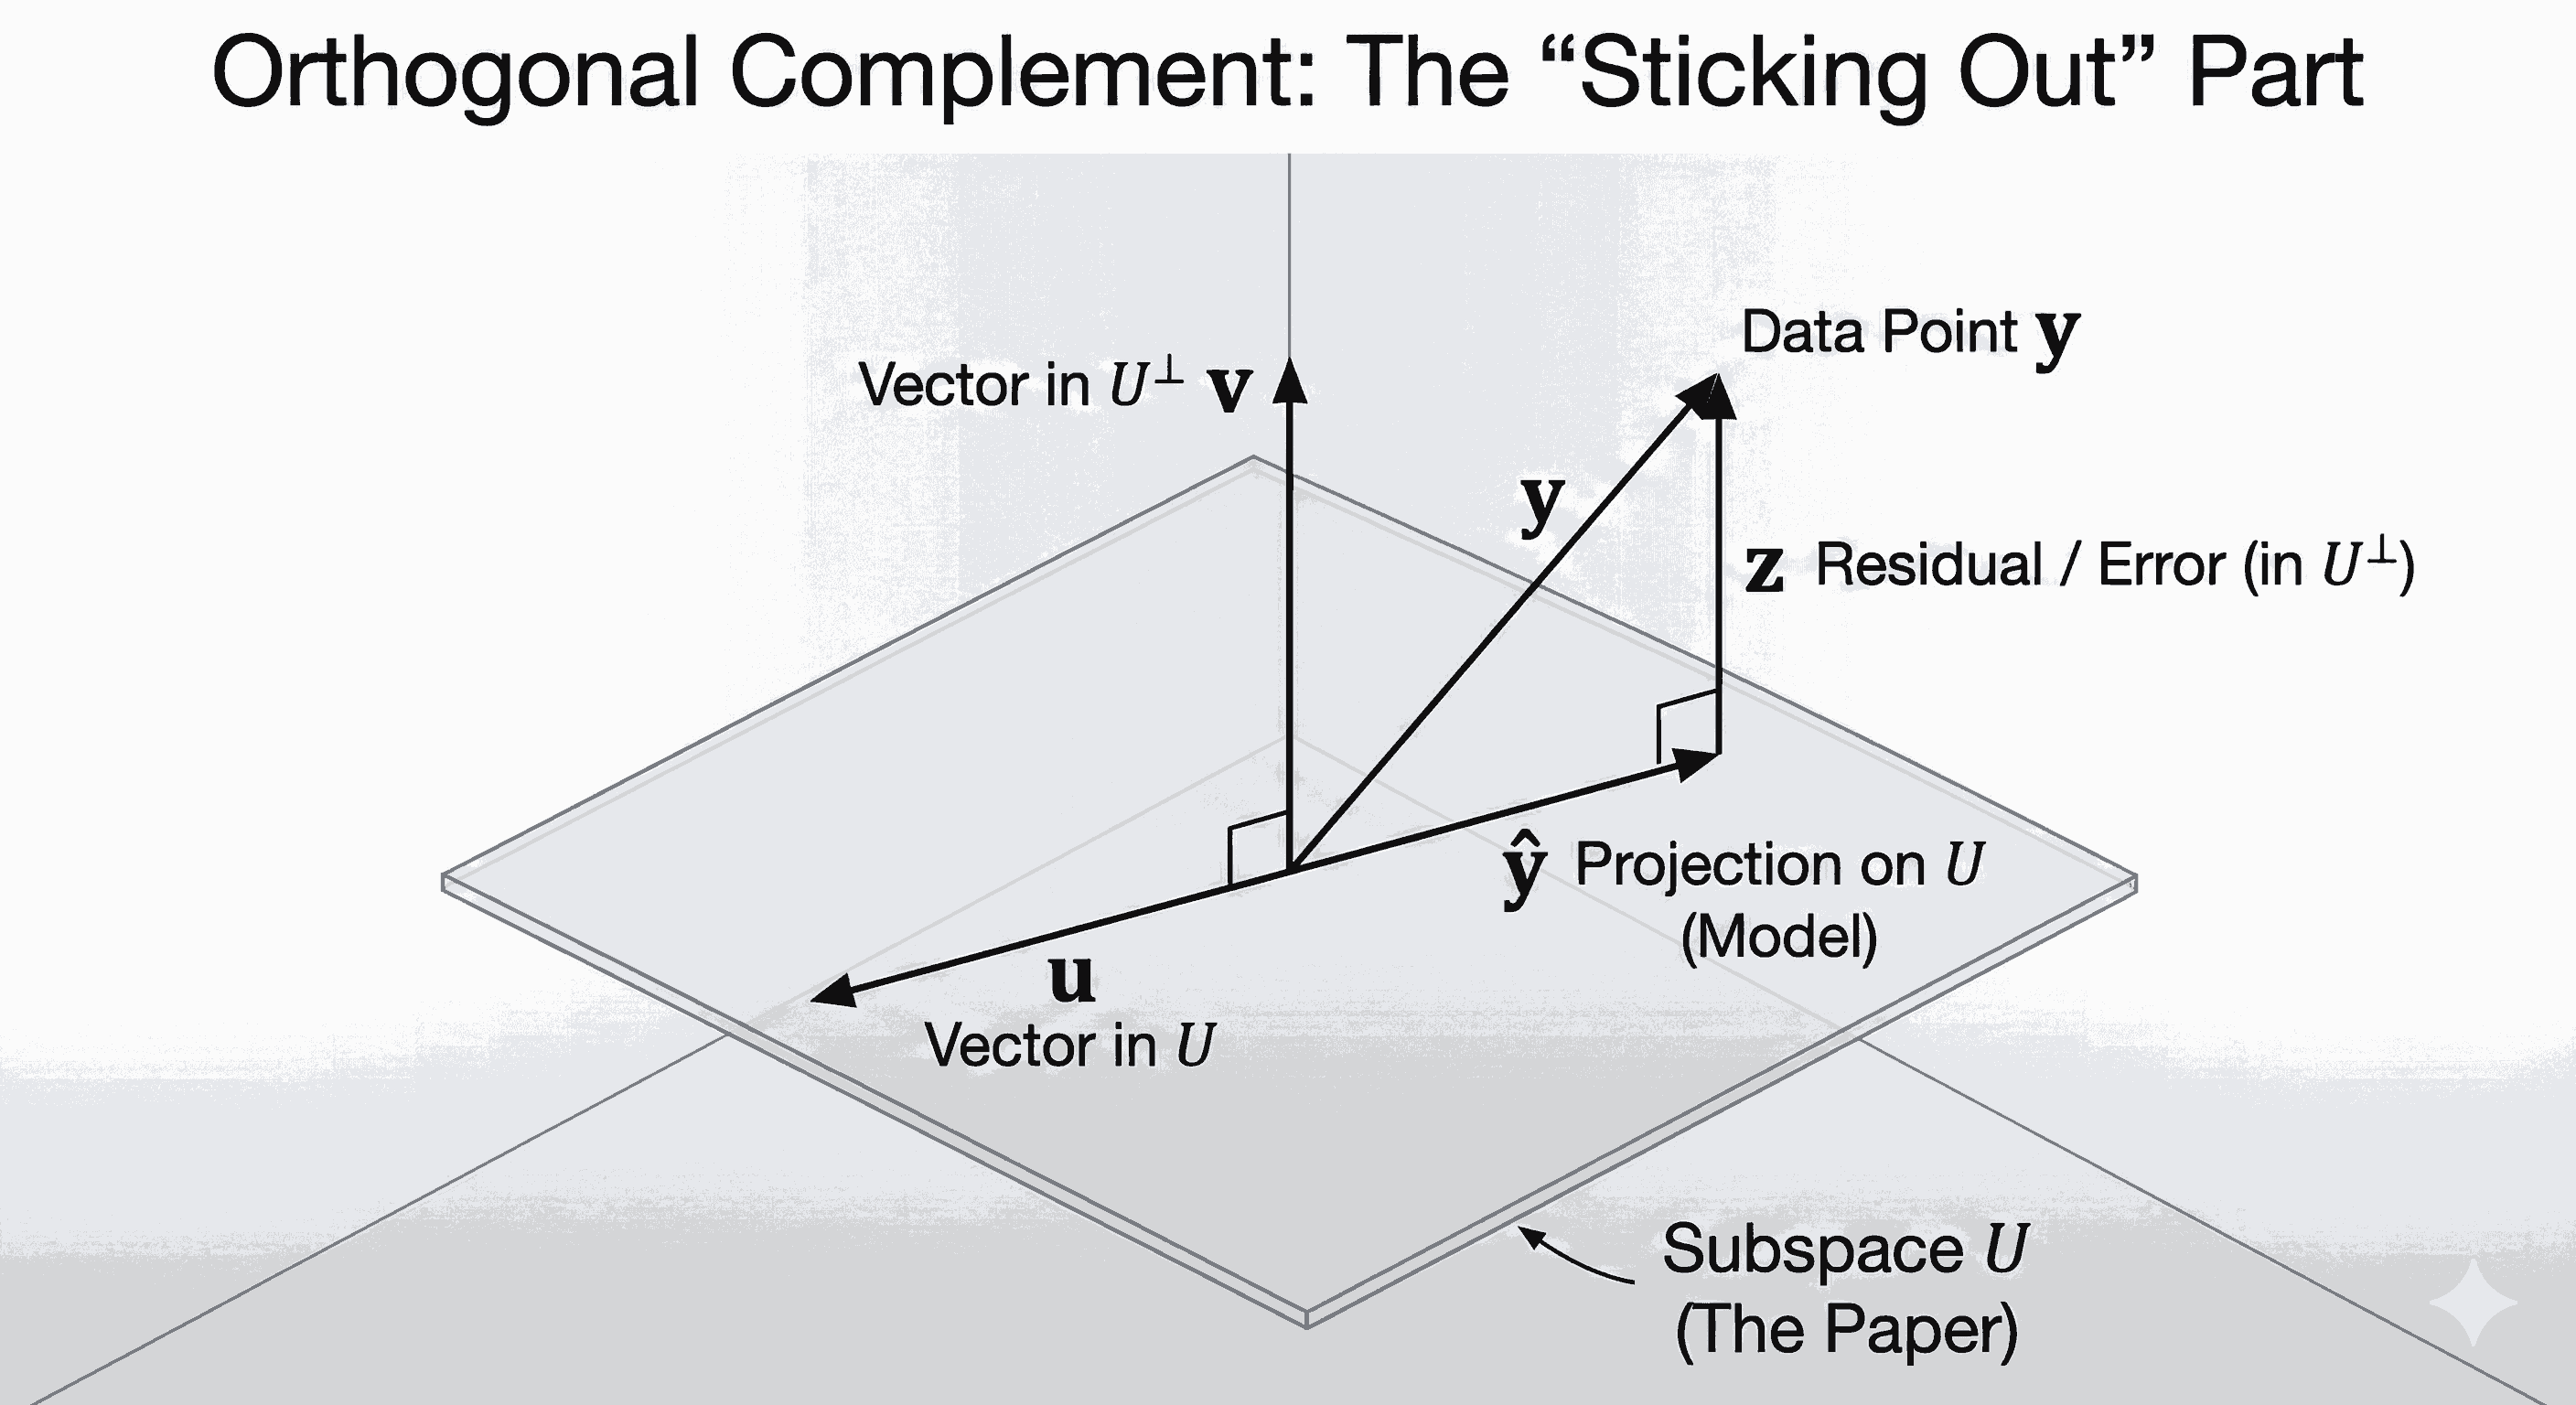

In [ ]:
# SUB-TOPIC: ORTHOGONAL COMPLEMENT

# We define a subspace U spanned by a single basis vector u1
# For simplicity, U is just the X-axis line in 3D space
u1 = np.array([1, 0, 0])
# A vector v in the full 3D space
v = np.array([3, 4, 5])


# Decompose v into component in U (parallel) and component in U_perp (perpendicular)
# Since u1 is the x-axis [1,0,0], the projection onto U is just the x-component of v.
# Logic: We keep the part of v that matches u1's direction.
v_parallel = np.array([3, 0, 0]) # Result: [3, 0, 0]
# The orthogonal complement part is the remainder (v - v_parallel)
# Logic: We take v and remove the part that was in U. What's left must be perpendicular.
v_perp = v - v_parallel # Result: [0, 4, 5]

print(f"Original Vector v: {v}")
print(f"Component in U (v_parallel): {v_parallel} (Signal/Model)")
print(f"Component in U_perp (v_perp): {v_perp} (Noise/Residual)")
# Verification: Dot product should be 0
check = np.dot(v_parallel, v_perp)
print(f"Dot Product Check: {check} (Proves orthogonality)")

Original Vector v: [3 4 5]
Component in U (v_parallel): [3 0 0] (Signal/Model)
Component in U_perp (v_perp): [0 4 5] (Noise/Residual)
Dot Product Check: 0 (Proves orthogonality)


## **7. Inner Product of Functions**

We usually think of vectors as arrows. But functions (like curves on a graph) can act like vectors too.

- Addition: We can add two curves to get a new curve.

- Scaling: We can stretch a curve vertically.

- Dot Product: We can take the "dot product" of two functions by multiplying them at every point and adding up all the results (which, in calculus, is finding the area under the curve via integration).

If this "area" is zero, the functions are orthogonal. Even though they curve and wiggle, they cancel each other out perfectly.

This is how noise-canceling headphones work: they create a sound wave that is the "opposite" of the noise, effectively summing to zero.

In [ ]:
# SUB-TOPIC: INNER PRODUCT OF FUNCTIONS
def function_inner_product(func_f, func_g, interval):
    """
    Computes inner product of two functions via numerical integration (Reimann Sum).
    Formula: Integral(f(x) * g(x) dx) over [a, b]
    """
    # Create 1000 points between start and end of interval
    x_vals = np.linspace(interval[0], interval[1], 1000)
    # Calculate the width of each tiny slice (dx)
    dx = x_vals[1] - x_vals[0]
    # Calculate f(x) * g(x) for all points
    y_vals = func_f(x_vals) * func_g(x_vals)
    # Sum up the area slices
    integral = np.sum(y_vals) * dx
    return integral

# Define our functions: sin(x) and cos(x)
f_sin = np.sin
f_cos = np.cos
# Interval [0, 2*pi] (One full wave cycle)
interval_2pi = [0, 2*np.pi]
val = function_inner_product(f_sin, f_cos, interval_2pi)
print(f"Inner Product of sin(x) and cos(x) over [0, 2pi]: {val:.5f}")
print("Result is approx 0. This proves sin and cos are orthogonal functions.")

Inner Product of sin(x) and cos(x) over [0, 2pi]: 0.00000
Result is approx 0. This proves sin and cos are orthogonal functions.


Task 7.1:
Calculate the inner product of $f(x) = 1$ (a constant horizontal line) and $g(x) = x$ (a diagonal line) over the interval $[-1, 1]$.

Intuition:
- $f(x)$ is symmetric (even).
- $g(x)$ is antisymmetric (odd).
- The area on the negative side (where $x$ is negative) should exactly cancel the area on the positive side.

Prediction: *What should the result be?*

Execution: Modify the code to test this hypothesis.

In [ ]:
#WRITE CODE HERE

## **8. Orthogonal Projections**

- Imagine the sun is shining directly overhead.
- You are standing on a flat field (the subspace).
- Your Orthogonal Projection is your shadow on the ground.

Closest Point:
- Your shadow is the single point on the ground that is closest to your head. - Any other point on the ground is further away.

Perpendicular:
- The line connecting your head to your shadow’s head goes straight down, perpendicular to the ground.

Compression:
- In machine learning, we use projections to "flatten" complex, 3D data onto simpler 2D surfaces (like drawing a map of the Earth).
- We want to do this flattening in a way that distorts the data as little as possible—keeping the "shadow" as accurate to the "real object" as we can.

In [ ]:
# SUB-TOPIC: ORTHOGONAL PROJECTIONS

def project_vector_onto_line(v, basis_vector):
    """
    Projects vector v onto the line spanned by basis_vector.
    Formula: proj_u(v) = ((v. u) / (u. u)) * u
    This scales the basis vector 'u' by the amount of 'v' that points in its direction.
    """
    # Numerator: Interaction between v and basis
    numerator = np.dot(v, basis_vector)

    # Denominator: Squared length of basis vector (normalization)
    denominator = np.dot(basis_vector, basis_vector)

    # The scalar projection (how "long" the shadow is)
    scalar_proj = numerator / denominator

    # The vector projection (the shadow itself)
    vector_proj = scalar_proj * basis_vector

    return vector_proj

# Project vec_a (3,4) onto vec_b (1,2)
# We want to find the shadow of 'a' falling on the line defined by 'b'
proj_a_on_b = project_vector_onto_line(vec_a, vec_b)

print(f"Vector a: {vec_a}")
print(f"Basis vector b: {vec_b}")
print(f"Projection of a onto b: {proj_a_on_b}")

# Check error vector (original - projection)
error_vec = vec_a - proj_a_on_b
# The error should be orthogonal (90 degrees) to the basis b
ortho_check = np.dot(error_vec, vec_b)
print(f"Orthogonality Check (Error. b): {ortho_check:.5f} (Should be 0)")

Vector a: [3 4]
Basis vector b: [1 2]
Projection of a onto b: [2.2 4.4]
Orthogonality Check (Error. b): -0.00000 (Should be 0)


## Task 8.1 : Project vec_x onto the subspace spanned by the Z-axis.

Intuition: Since you are projecting onto the Z-axis, the projection should effectively "delete" the X and Y components and keep only the Z component of the original vector.

Execution: Use the function to compute the projection and verify the result.

In [ ]:
#WRITE CODE HERE

## **9. Rotations**
A rotation is simply spinning the entire data landscape (or the object itself) around a fixed point.

- Rigid Motion:
  - Imagine holding a picture frame.
  - If you turn it 90 degrees, the picture doesn't get bigger or smaller (Length is preserved).
  - The corners of the frame remain 90 degrees (Angles are preserved).
  - The geometry is unchanged; only the orientation changes.

- Invariance:
  - In machine learning, we often want our AI to recognize a cat whether the cat is standing up or tilting its head.
  - By applying rotations to our training data, we teach the AI that "orientation doesn't change the identity of the object."

- Perspective:
  - Rotations allow us to change our perspective to find the "best" angle to look at the data, just like turning a diamond in the light to see its facets clearly.

In [ ]:
# SUB-TOPIC: ROTATIONS

def rotate_2d(vector, theta_degrees):
    """
    Rotates a 2D vector by theta degrees counter-clockwise using a rotation matrix.
    """
    # Convert degrees to radians (math functions expect radians)
    theta_rad = np.radians(theta_degrees)

    # Define the Rotation Matrix R
    # Row 1: [cos, -sin]
    # Row 2: [sin, cos]
    c, s = np.cos(theta_rad), np.sin(theta_rad)
    R = np.array(((c, -s), (s, c)))

    # Apply transformation via matrix multiplication (Dot product)
    v_rotated = np.dot(R, vector)
    return v_rotated

# Original Vector (1, 0) - points East
v_east = np.array([1,0])

# Rotate 90 degrees (should point North)
v_north = rotate_2d(v_east, 90)

# Rotate 45 degrees (North-East)
v_ne = rotate_2d(v_east, 45)

print(f"Original: {v_east}")
print(f"Rotated 90 deg: {v_north} (Expected: ~)")
print(f"Rotated 45 deg: {v_ne}")

# Verify Length Conservation
len_orig = np.linalg.norm(v_east)
len_rot = np.linalg.norm(v_ne)
print(f"Length Original: {len_orig:.2f}, Length Rotated: {len_rot:.2f} (Should be equal)")

Original: [1 0]
Rotated 90 deg: [6.123234e-17 1.000000e+00] (Expected: ~)
Rotated 45 deg: [0.70710678 0.70710678]
Length Original: 1.00, Length Rotated: 1.00 (Should be equal)


## Task: Rotate the vector vec_a ($$) by 180 degrees.

Expectation: Rotating by 180 degrees is equivalent to flipping the vector to the opposite side of the origin. It should point in the exact opposite direction.

Prediction: *If the input is $$, what should the output be?*

Execution: Run the code and confirm your prediction.

In [ ]:
#WRITE CODE HERE